<a href="https://colab.research.google.com/github/RadianceRedefined/creating-cohorts-of-songs/blob/main/Cohorts_of_Songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("rolling_stones_spotify.csv")

# Preview top rows
df.head()


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [2]:
# Dataset summary
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Get quick stats
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610,1610,1610,1610.000000,1610,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
unique,NaN,954,90,57,NaN,1610,1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Brown Sugar - Live,Voodoo Lounge Uncut (Live),1972-05-12,NaN,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16,56,75,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,804.500000,NaN,NaN,NaN,8.613665,NaN,NaN,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,NaN,NaN,NaN,6.560220,NaN,NaN,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,NaN,NaN,NaN,4.000000,NaN,NaN,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,NaN,NaN,NaN,7.000000,NaN,NaN,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,NaN,NaN,NaN,11.000000,NaN,NaN,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000


In [3]:
# Step 1b: Clean the dataset
df = df.drop(columns=['Unnamed: 0', 'id', 'uri'])
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Verify cleanup
print("Columns after cleanup:", df.columns.tolist())
df.head()


Columns after cleanup: ['name', 'album', 'release_date', 'track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']


,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
# Step 2a: Summary statistics for numeric columns
df.describe()


,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


In [5]:
# Step 2b: Find albums with most popular songs
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

# Show top 10 albums
print(album_popularity.head(10))


album
Sticky Fingers (Remastered)                                  53.300000
Some Girls                                                   48.100000
Tattoo You (2009 Re-Mastered)                                46.454545
Exile On Main Street (2010 Re-Mastered)                      44.166667
Beggars Banquet (50th Anniversary Edition)                   43.700000
Aftermath                                                    43.090909
Goats Head Soup (Remastered 2009)                            40.300000
Out Of Our Heads                                             39.583333
Black And Blue (Remastered 2009)                             38.500000
Let It Bleed (50th Anniversary Edition / Remastered 2019)    38.333333
Name: popularity, dtype: float64


/tmp/ipython-input-3639175164.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.values, y=top_albums.index, palette='viridis')


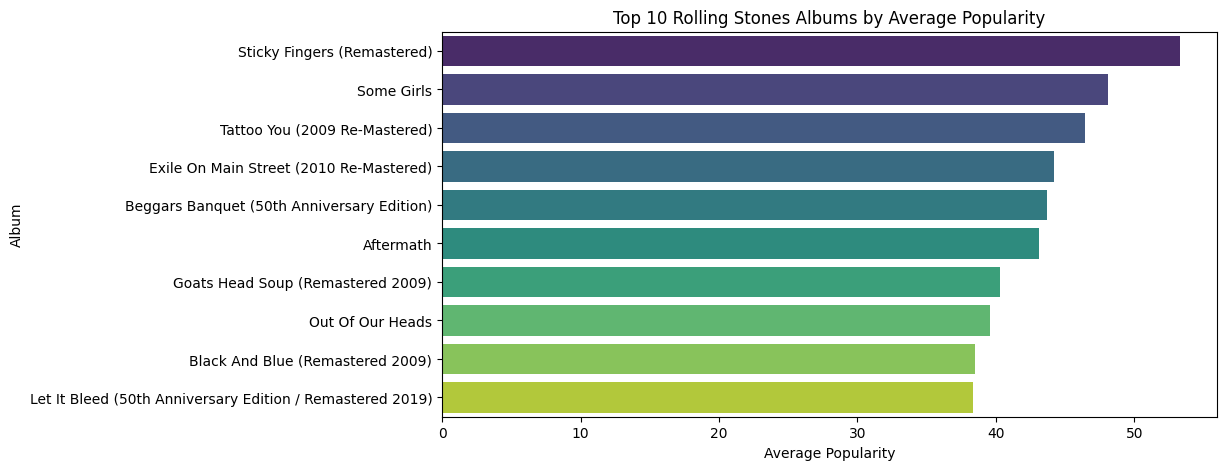

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
top_albums = album_popularity.head(10)
sns.barplot(x=top_albums.values, y=top_albums.index, palette='viridis')
plt.title("Top 10 Rolling Stones Albums by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Album")
plt.show()


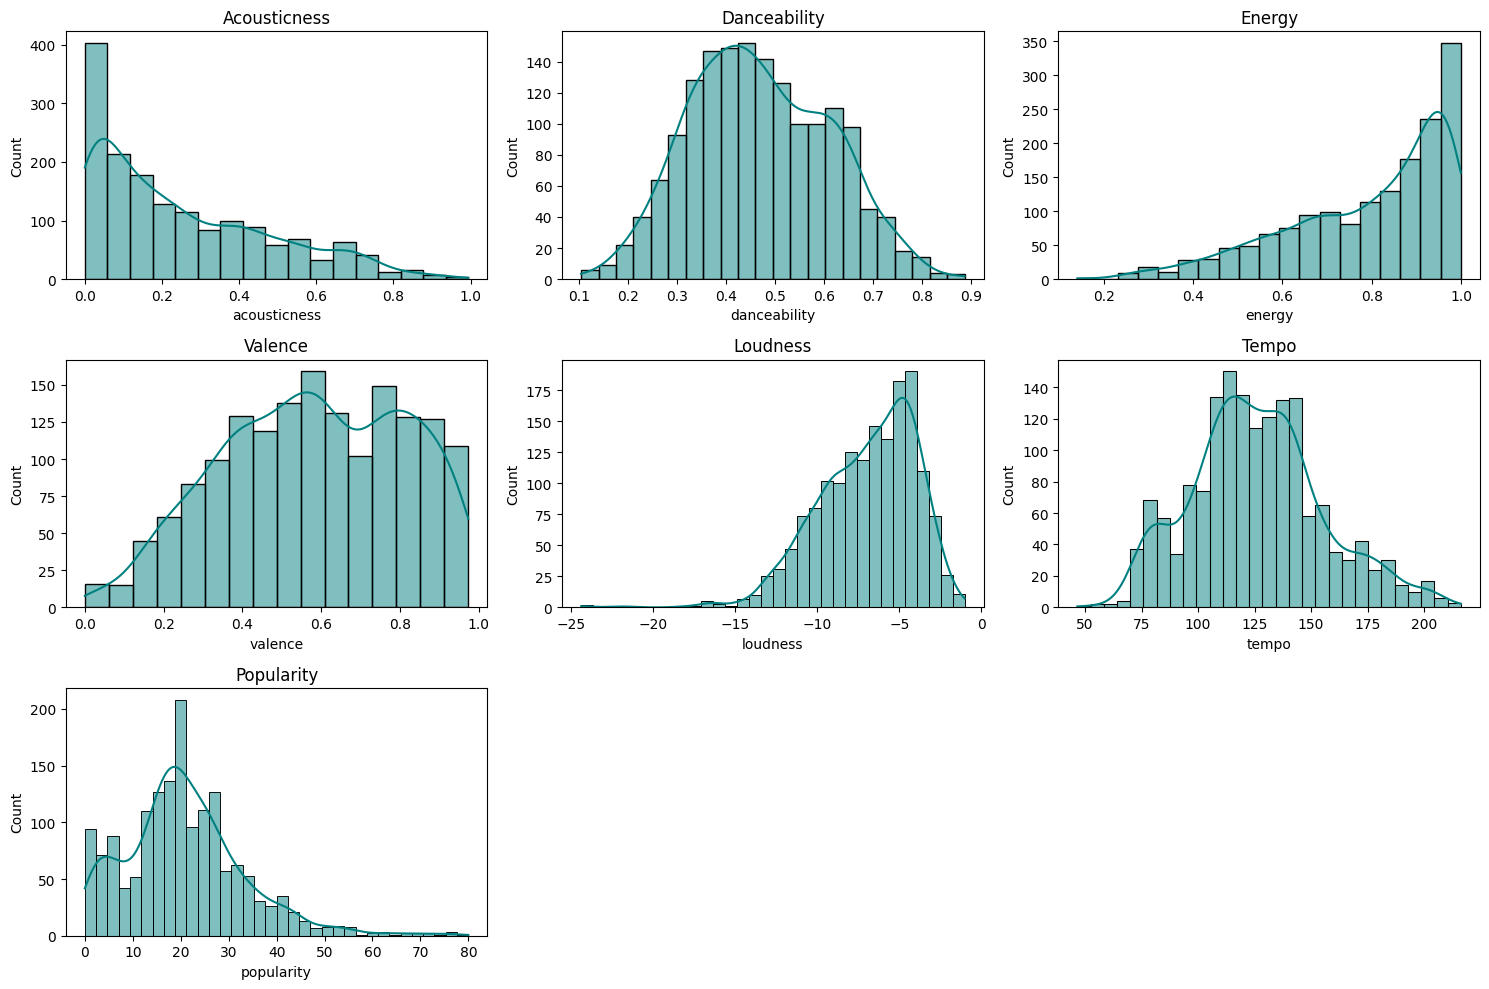

In [7]:
# Step 2c: Distribution of key musical features
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'valence', 'loudness', 'tempo', 'popularity']

plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(col.capitalize())
plt.tight_layout()
plt.show()


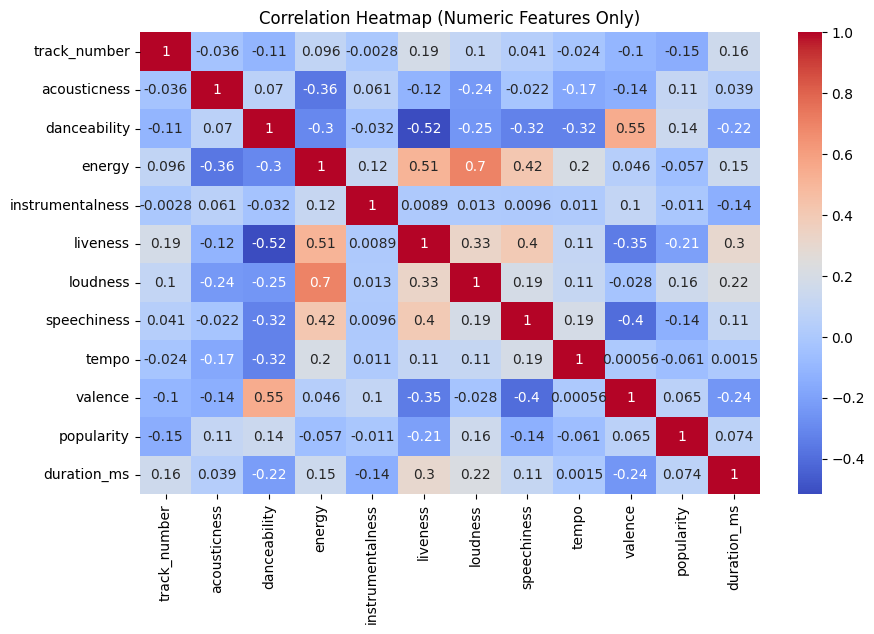

In [9]:
# Step 3 (Fixed): Correlation Heatmap for numeric columns only
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



In [11]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


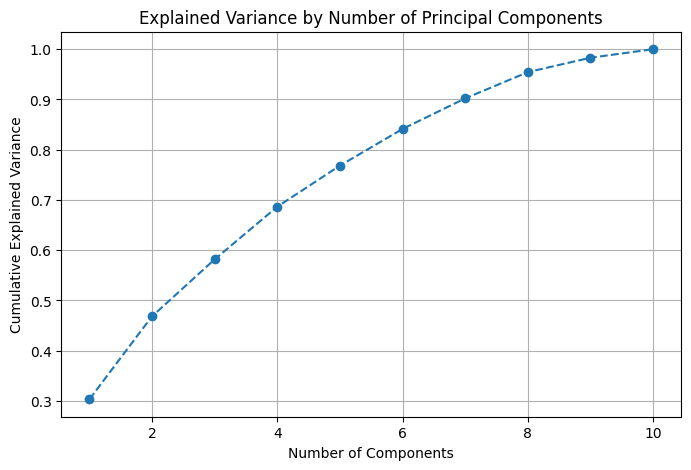

In [12]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Number of Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


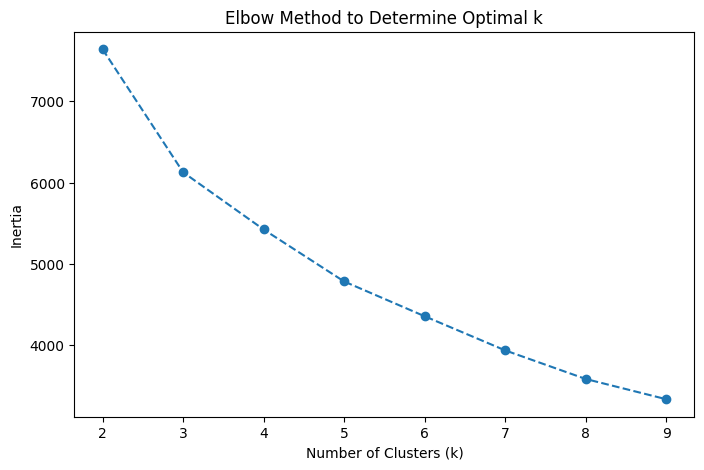

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different cluster counts
inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca[:, :4])  # use first 4 principal components
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [14]:
# Step 5b: Apply K-Means clustering with k = 3
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca[:, :4])  # use first 4 principal components

# View cluster counts
print(df['cluster'].value_counts())
df.head()


cluster
2    606
0    579
1    425
Name: count, dtype: int64


,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,0
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,0
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,0
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,0
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,0


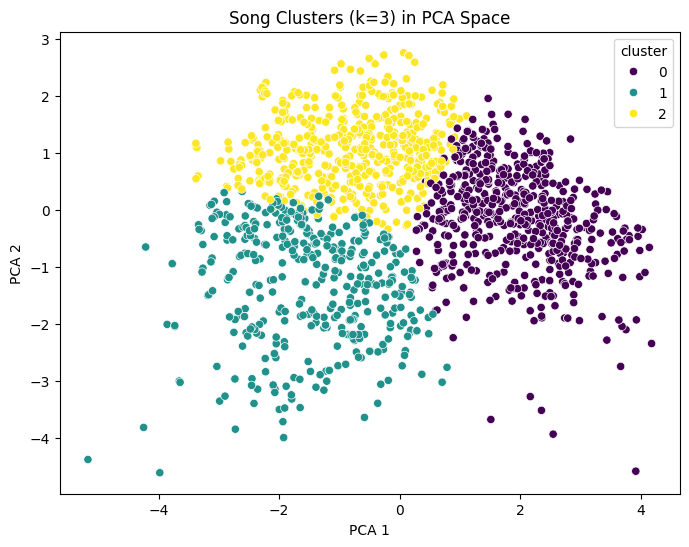

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=df['cluster'], palette='viridis'
)
plt.title("Song Clusters (k=3) in PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [16]:
# Step 6a: Check average feature values per cluster
cluster_summary = df.groupby('cluster')[['energy', 'danceability', 'acousticness',
                                         'valence', 'loudness', 'tempo', 'popularity']].mean()
print(cluster_summary)


           energy  danceability  acousticness   valence  loudness       tempo  \
cluster                                                                         
0        0.923731      0.358282      0.189317  0.443628 -5.332722  137.995617   
1        0.568355      0.494859      0.432126  0.487188 -9.763024  115.403682   
2        0.823921      0.556277      0.181512  0.781140 -6.579817  122.188195   

         popularity  
cluster              
0         18.044905  
1         21.882353  
2         22.641914  
